In [1]:
# importing required libraries
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Fraud_check.csv to Fraud_check.csv


In [3]:
Fraud_check = pd.read_csv('Fraud_check.csv')

In [4]:
#creat dummies for comp_data
Fraud_check = pd.get_dummies(Fraud_check, columns = ["Undergrad", "Marital.Status", "Urban"])

In [5]:
Fraud_check

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,68833,50047,10,1,0,0,0,1,0,1
1,33700,134075,18,0,1,1,0,0,0,1
2,36925,160205,30,1,0,0,1,0,0,1
3,50190,193264,15,0,1,0,0,1,0,1
4,81002,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
595,76340,39492,7,0,1,1,0,0,0,1
596,69967,55369,2,0,1,1,0,0,0,1
597,47334,154058,0,1,0,1,0,0,0,1
598,98592,180083,17,0,1,0,1,0,1,0


In [6]:
Fraud_check.isna().sum()

Taxable.Income             0
City.Population            0
Work.Experience            0
Undergrad_NO               0
Undergrad_YES              0
Marital.Status_Divorced    0
Marital.Status_Married     0
Marital.Status_Single      0
Urban_NO                   0
Urban_YES                  0
dtype: int64

In [7]:
x = Fraud_check.iloc[:,1:]
x

,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,50047,10,1,0,0,0,1,0,1
1,134075,18,0,1,1,0,0,0,1
2,160205,30,1,0,0,1,0,0,1
3,193264,15,0,1,0,0,1,0,1
4,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
595,39492,7,0,1,1,0,0,0,1
596,55369,2,0,1,1,0,0,0,1
597,154058,0,1,0,1,0,0,0,1
598,180083,17,0,1,0,1,0,1,0


In [8]:
y = Fraud_check.iloc[:,0]
y

0      68833
1      33700
2      36925
3      50190
4      81002
       ...  
595    76340
596    69967
597    47334
598    98592
599    96519
Name: Taxable.Income, Length: 600, dtype: int64

In [9]:
#Splitting data into training and testing dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## MODEL BUIDING USING DECISION TREE AND REGRESSOR METHOD

In [10]:
from sklearn.tree import DecisionTreeRegressor

In [11]:
model_R = DecisionTreeRegressor()
model_R.fit(x_train, y_train)

DecisionTreeRegressor()

In [12]:
preds = model_R.predict(x_test)

In [13]:
np.mean(preds==y_test)

0.0

In [14]:
#Find the accuracy
model_R.score(x_test,y_test)

-0.8967638480848574

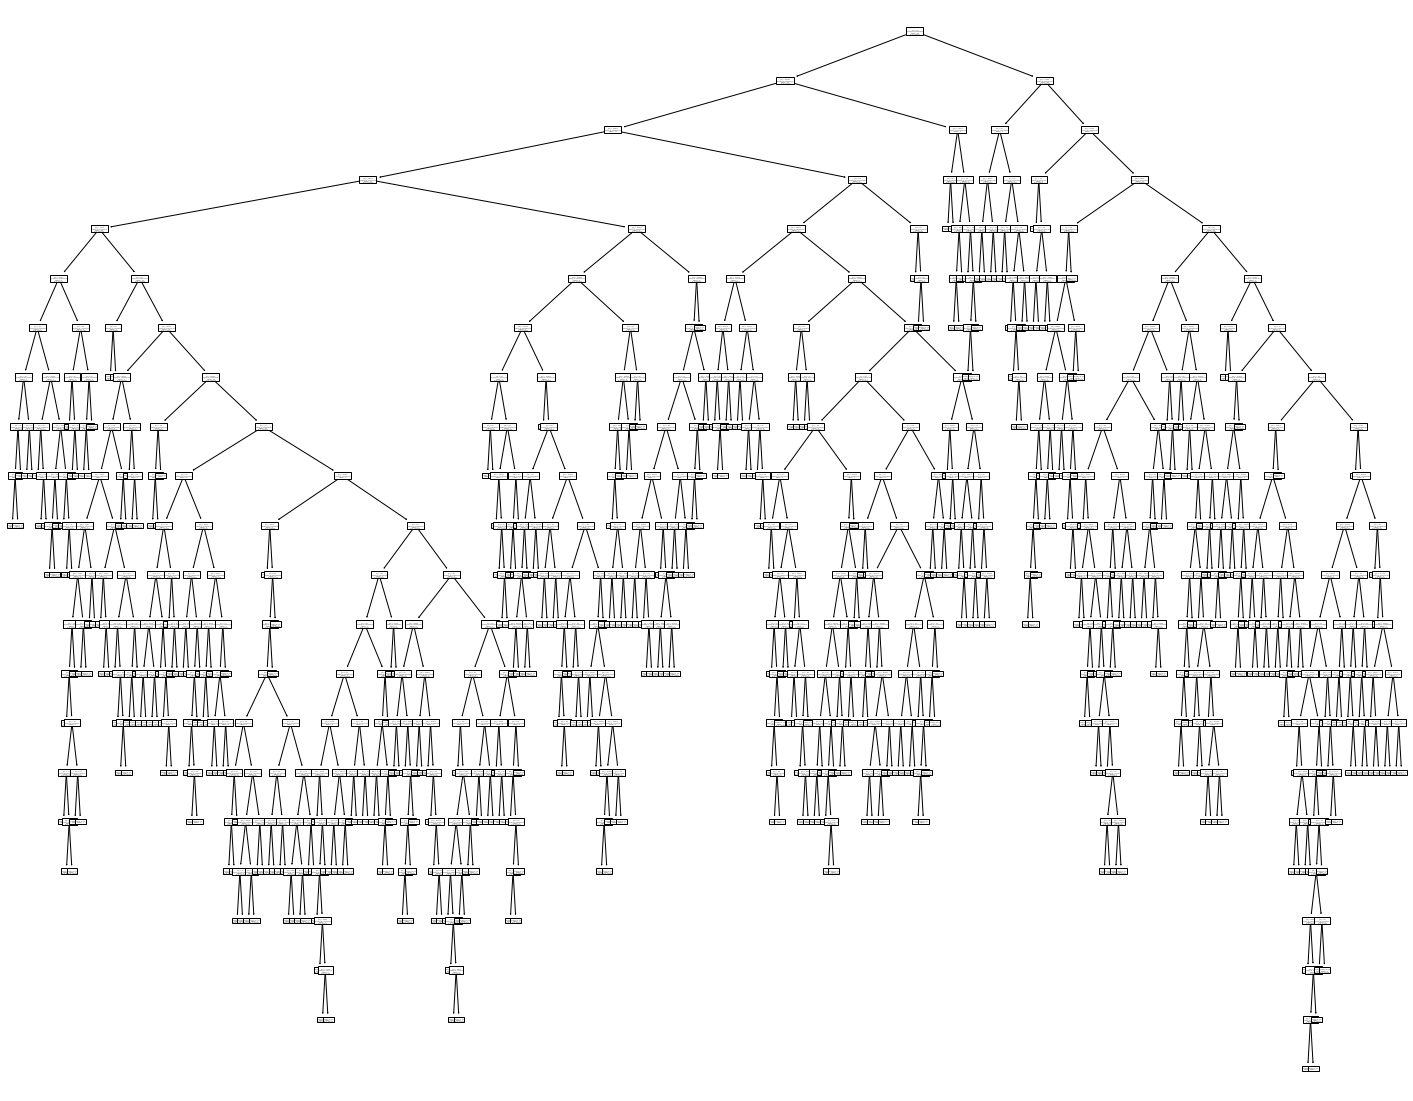

In [15]:
# Decision Tree Regression
fig = plt.figure(figsize=(25,20))
fig = tree.plot_tree(model_R)

### Since accuracy is coming negative value, Regressor is not a good choice of model for given dataset